In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download pkdarabi/cardetection


Dataset URL: https://www.kaggle.com/datasets/pkdarabi/cardetection
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/99.8M [00:00<?, ?B/s]
100% 99.8M/99.8M [00:00<00:00, 1.41GB/s]


In [ ]:
!unzip -q cardetection.zip -d .



In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.8 MB/s eta 0:00:00


In [ ]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
Image_dir = './car/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)
print(image_files)

['00003_00008_00004_png.rf.655f24b839701fb9cfb3bfb182e5247a.jpg', 'road712_png.rf.ee2432f1a6c4df0988307770b8e199d9.jpg', '000482_jpg.rf.d6330a6e4c7e0bf7b5274add14067e58.jpg', '00001_00041_00008_png.rf.d0ec8b61f49fc96343d0f70baf4df83d.jpg', 'road299_png.rf.f1bb13d4268eec88db4f941ad7578468.jpg', 'FisheyeCamera_1_00014_png.rf.dc026ede70fb1719befc498babae4206.jpg', '00005_00019_00024_png.rf.1e4d4e1f102e23d237d80e3707e79a95.jpg', 'road265_png.rf.c2291fba01fa28f0900d8c89ac24c0db.jpg', '00004_00030_00001_png.rf.f99cce076297b692a1752d102bd36fdb.jpg', '00001_00027_00011_png.rf.1ce3199512554428d486d4983f82ee4f.jpg', 'road315_png.rf.23624604737079ffca46bee770976934.jpg', 'FisheyeCamera_1_00380_png.rf.1bb91d605253943b753f048a4417f3a7.jpg', '00004_00043_00018_png.rf.1395220f3e929cca6e266bb6f0d3a5be.jpg', '000362_jpg.rf.786ad91389e130a42ef6a403f3d4b426.jpg', '00003_00034_00007_png.rf.985cc2a26aaca59321b5e8a8eddea3f1.jpg', '000831_jpg.rf.311dfb9a79b82df23b714f71f7e0aa8d.jpg', 'road552_png.rf.f7116a13

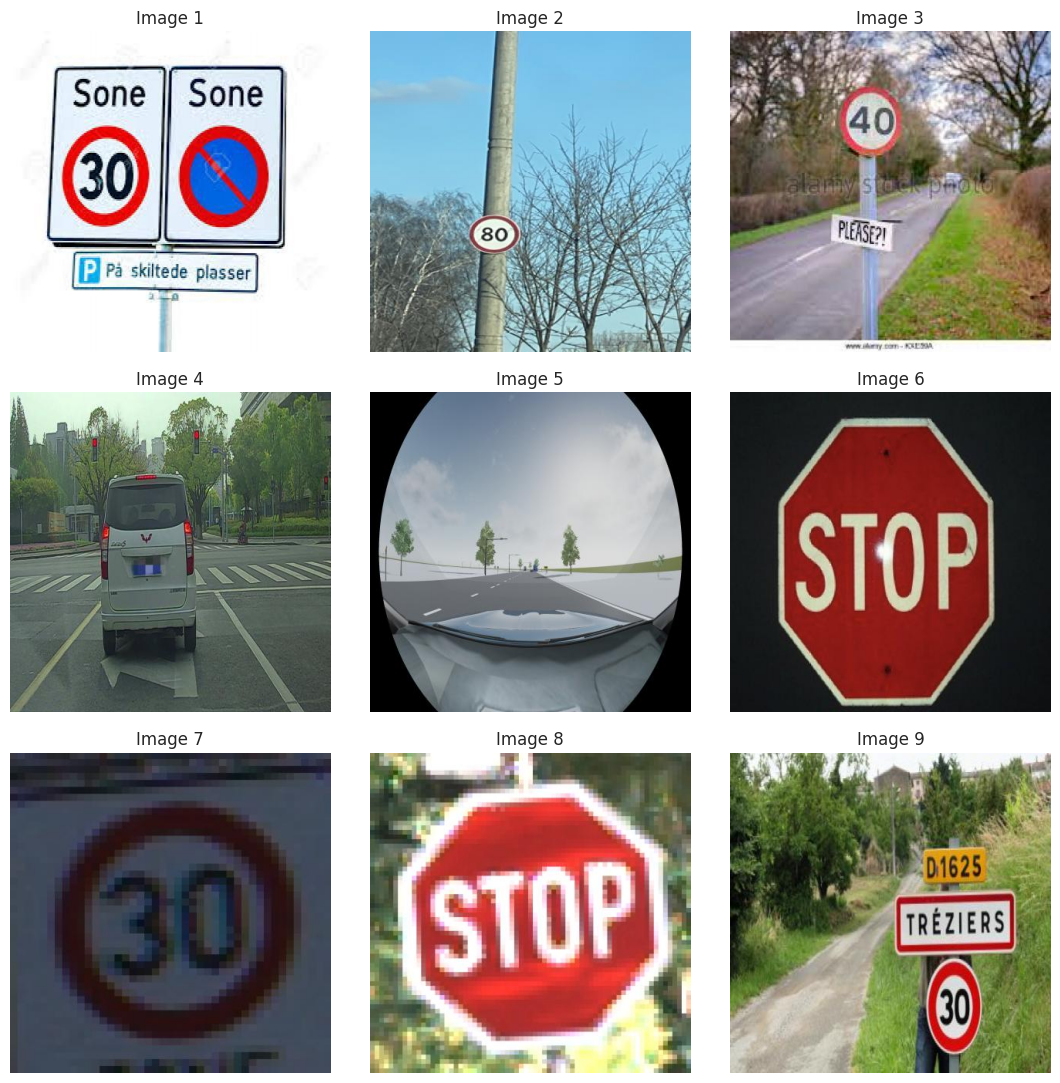

In [ ]:
# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
image = cv2.imread("./car/train/images/00000_00000_00012_png.rf.23f94508dba03ef2f8bd187da2ec9c26.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.



image 1/1 /content/car/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg: 640x640 (no detections), 455.4ms
Speed: 21.6ms preprocess, 455.4ms inference, 19.9ms postprocess per image at shape (1, 3, 640, 640)


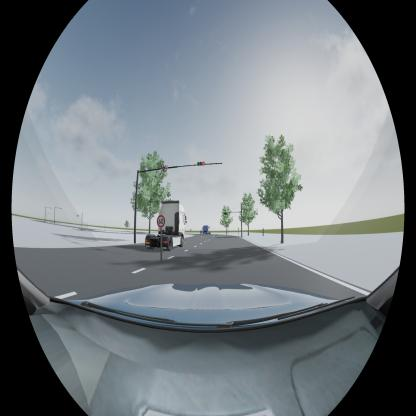

In [ ]:
model = YOLO("yolov8n.pt")

image = "car/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg"
result_predict = model.predict(source = image, imgsz=(640))


plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [ ]:
!pip install --upgrade ultralytics ray


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 MB 11.4 MB/s eta 0:00:00


In [ ]:
# Build from YAML and transfer weights
Final_model = YOLO('yolov8n.pt')

# Training The Final Model
Result_Final_model = Final_model.train(data="./car/data.yaml",epochs = 30, batch = -1, optimizer = 'auto')

Ultralytics 8.3.188 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./car/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profil

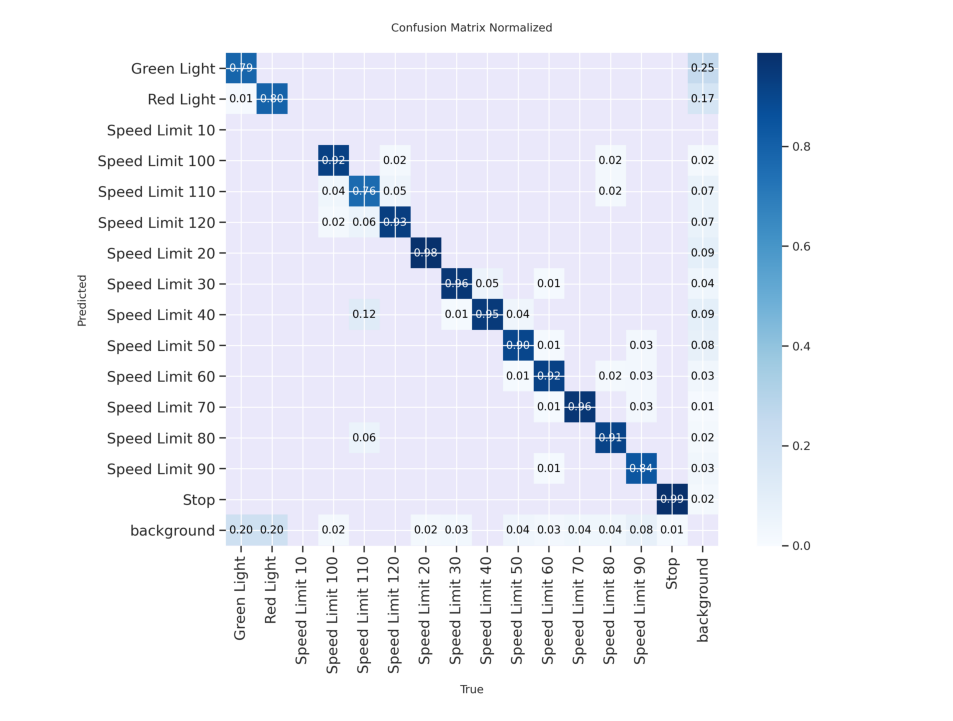

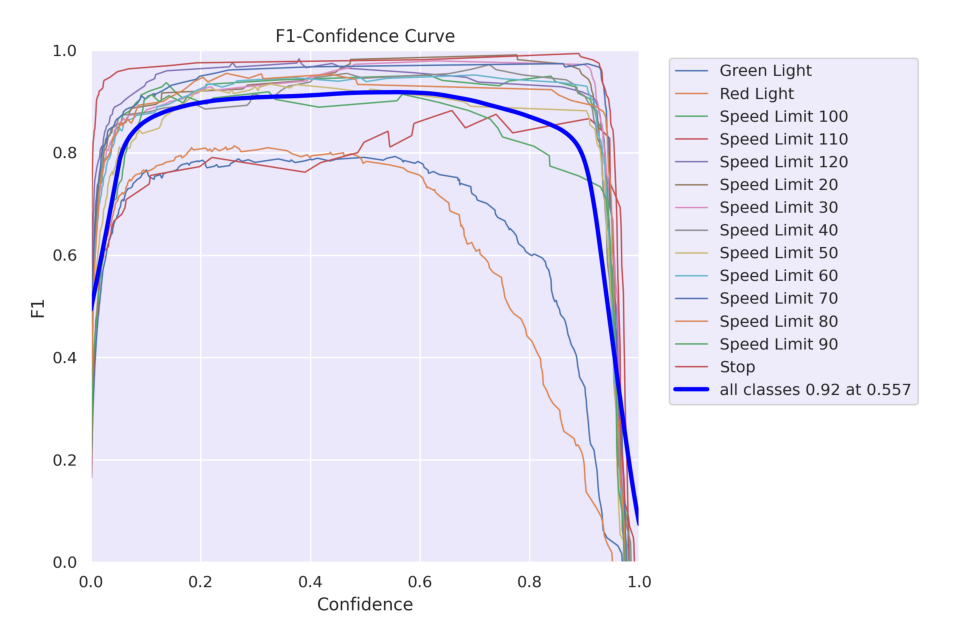

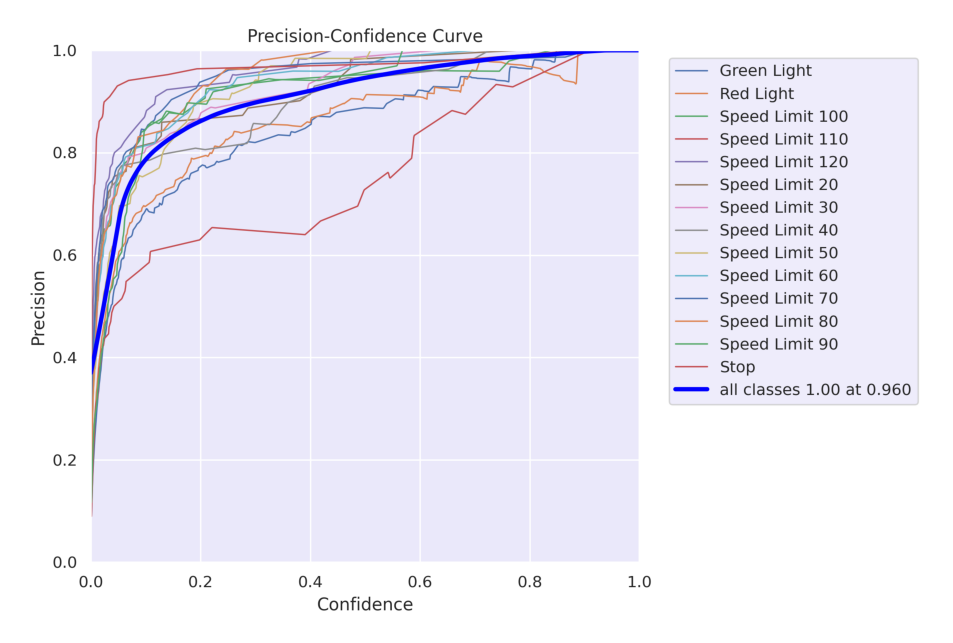

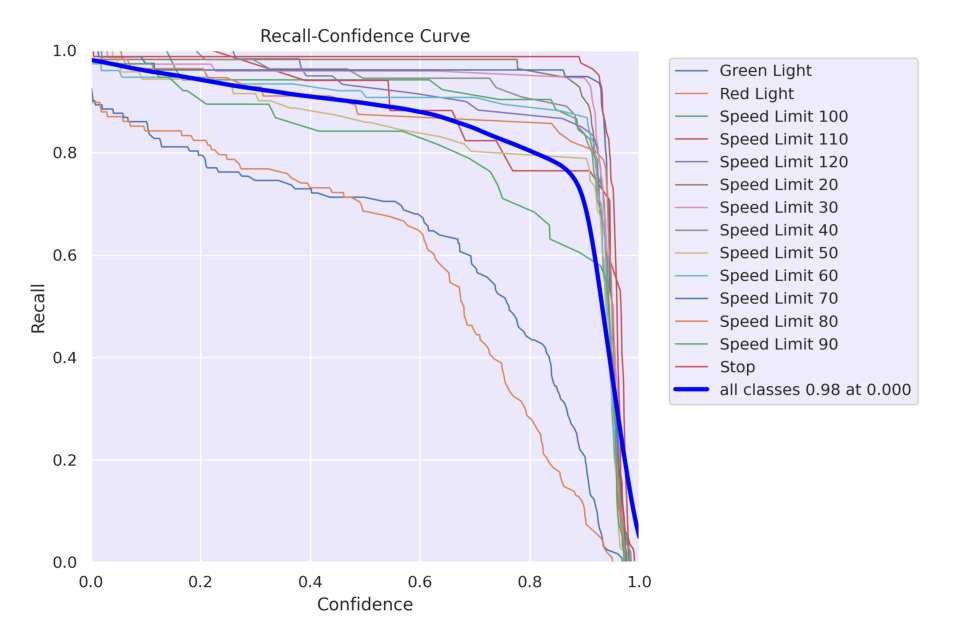

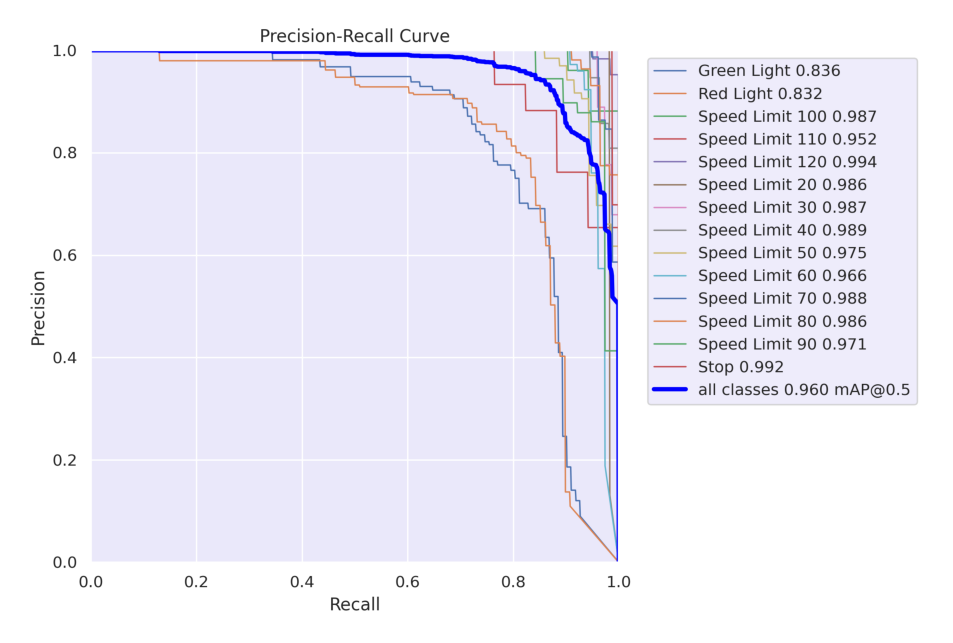

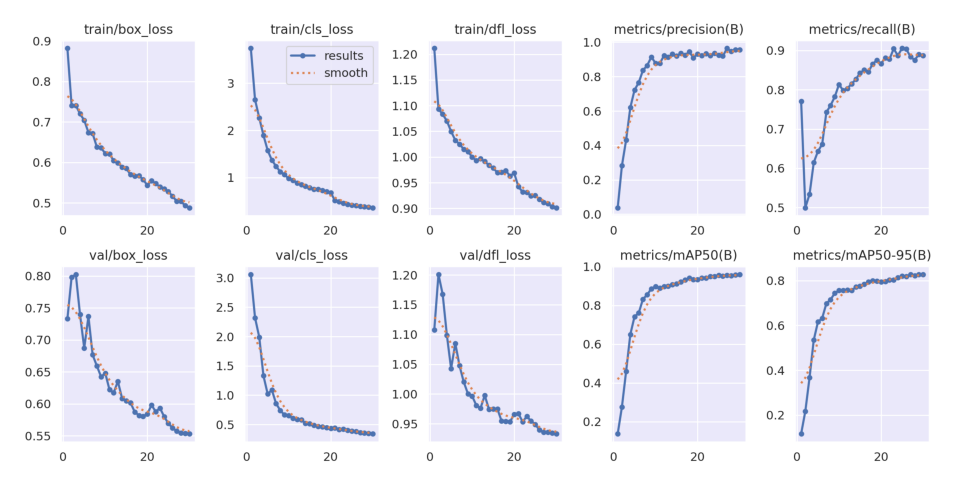

In [ ]:
import cv2
import matplotlib.pyplot as plt

def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'BoxF1_curve.png',
    'BoxP_curve.png',
    'BoxR_curve.png',
    'BoxPR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = './runs/detect/train'

# Display the images
display_images(post_training_files_path, image_files)

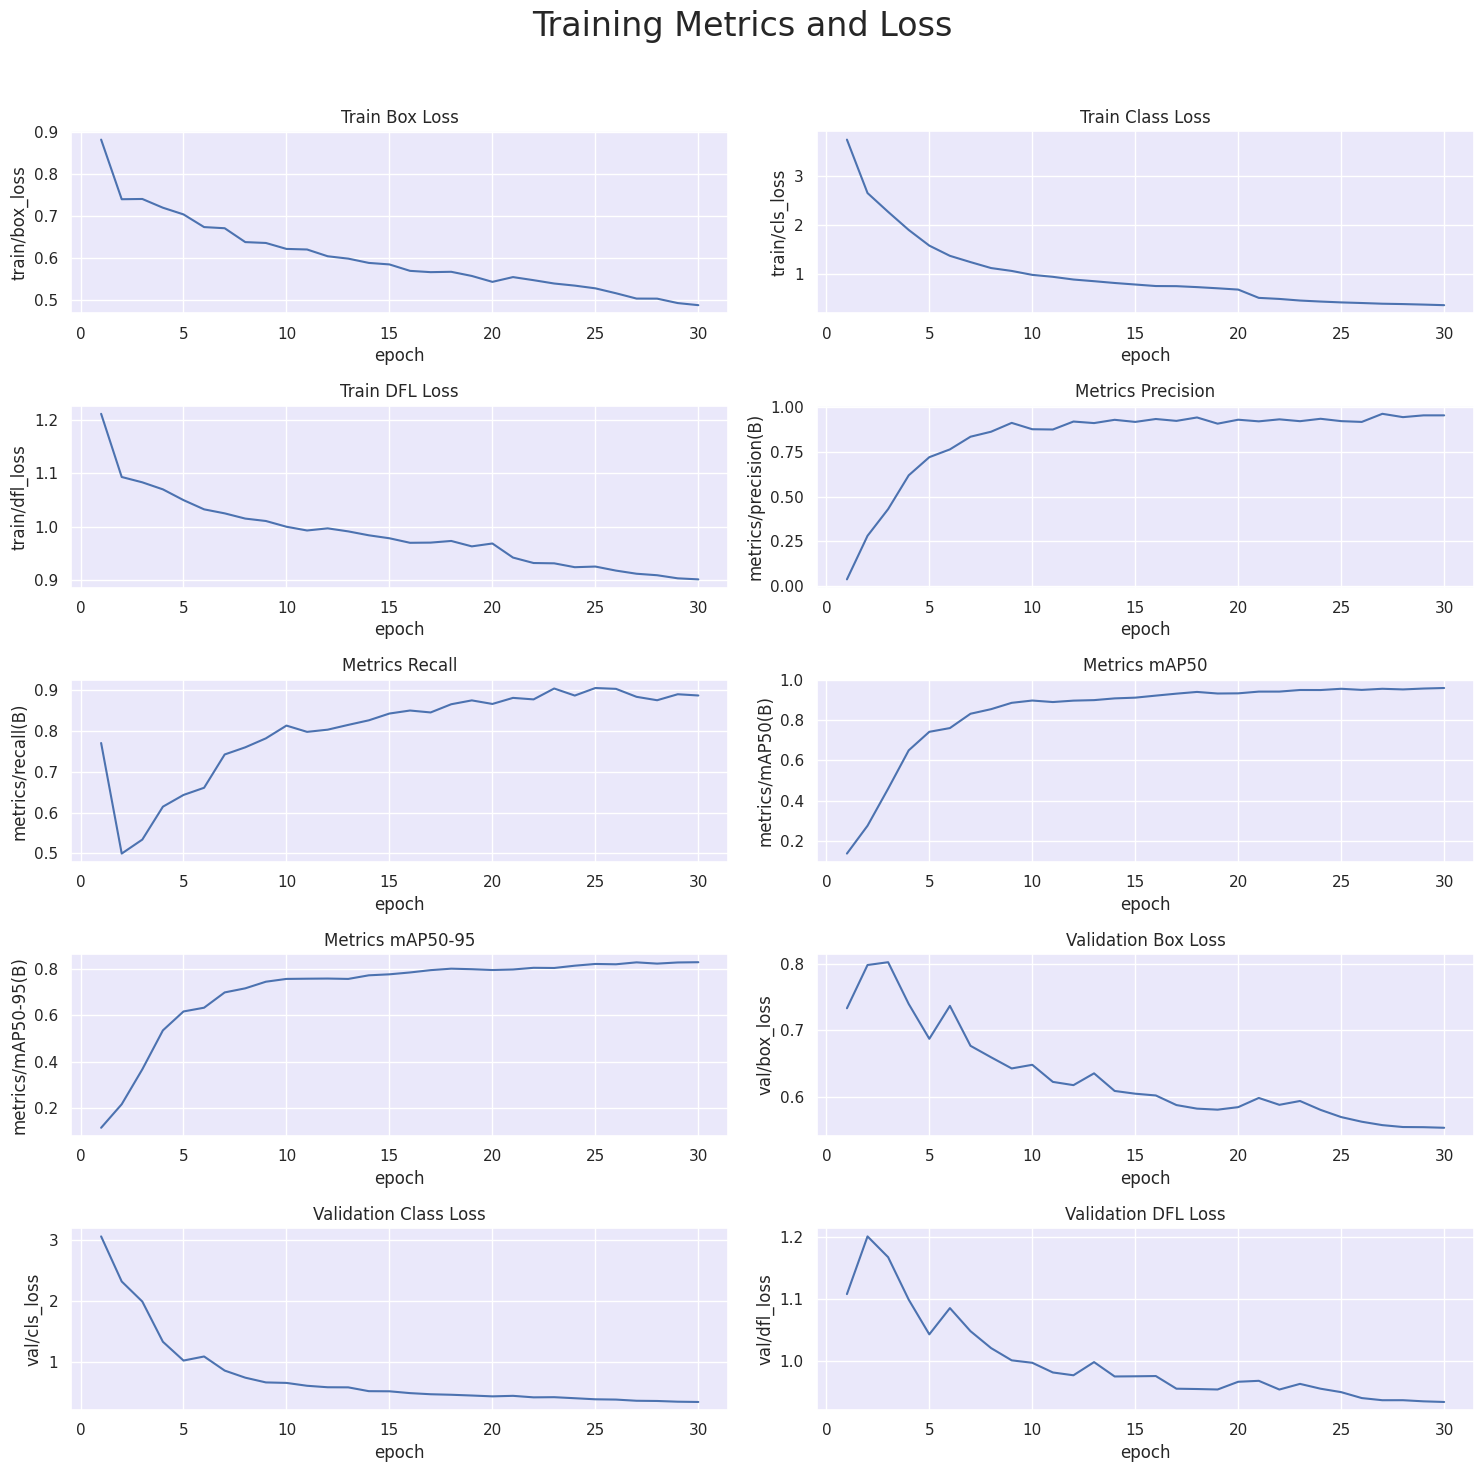

In [ ]:
import os, glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # 이미 쓰고 있으니 유지

# 1) 가장 최근 학습 결과(results.csv) 찾기
runs = sorted(glob.glob("runs/detect/train*"))
assert runs, "runs/detect/ 아래 학습 폴더가 없습니다. 먼저 model.train(...)을 실행하세요."
results_csv = os.path.join(runs[-1], "results.csv")
assert os.path.exists(results_csv), f"{results_csv} 파일이 없습니다."

# 2) DataFrame 로드
df = pd.read_csv(results_csv)
df.columns = df.columns.str.strip()

# 3) 버전별 컬럼명 차이를 흡수 (있으면 쓰고 없으면 대안)
def pick(*cands):
    for c in cands:
        if c in df.columns:
            return c
    return None

col_epoch        = pick("epoch")
col_train_box    = pick("train/box_loss")
col_train_cls    = pick("train/cls_loss")
col_train_dfl    = pick("train/dfl_loss")
col_val_box      = pick("val/box_loss")
col_val_cls      = pick("val/cls_loss")
col_val_dfl      = pick("val/dfl_loss")

# precision/recall/mAP 컬럼은 (B)가 붙은 버전과 안 붙은 버전이 섞여 있습니다.
col_precision    = pick("metrics/precision(B)", "metrics/precision")
col_recall       = pick("metrics/recall(B)",    "metrics/recall")
col_map50        = pick("metrics/mAP50(B)",     "metrics/mAP50")
col_map5095      = pick("metrics/mAP50-95(B)",  "metrics/mAP50-95")

# 4) 플롯
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

if col_train_box and col_epoch:
    sns.lineplot(x=col_epoch, y=col_train_box, data=df, ax=axs[0,0]); axs[0,0].set(title='Train Box Loss')
if col_train_cls and col_epoch:
    sns.lineplot(x=col_epoch, y=col_train_cls, data=df, ax=axs[0,1]); axs[0,1].set(title='Train Class Loss')
if col_train_dfl and col_epoch:
    sns.lineplot(x=col_epoch, y=col_train_dfl, data=df, ax=axs[1,0]); axs[1,0].set(title='Train DFL Loss')

if col_precision and col_epoch:
    sns.lineplot(x=col_epoch, y=col_precision, data=df, ax=axs[1,1]); axs[1,1].set(title='Metrics Precision')
if col_recall and col_epoch:
    sns.lineplot(x=col_epoch, y=col_recall, data=df, ax=axs[2,0]); axs[2,0].set(title='Metrics Recall')
if col_map50 and col_epoch:
    sns.lineplot(x=col_epoch, y=col_map50, data=df, ax=axs[2,1]); axs[2,1].set(title='Metrics mAP50')
if col_map5095 and col_epoch:
    sns.lineplot(x=col_epoch, y=col_map5095, data=df, ax=axs[3,0]); axs[3,0].set(title='Metrics mAP50-95')

if col_val_box and col_epoch:
    sns.lineplot(x=col_epoch, y=col_val_box, data=df, ax=axs[3,1]); axs[3,1].set(title='Validation Box Loss')
if col_val_cls and col_epoch:
    sns.lineplot(x=col_epoch, y=col_val_cls, data=df, ax=axs[4,0]); axs[4,0].set(title='Validation Class Loss')
if col_val_dfl and col_epoch:
    sns.lineplot(x=col_epoch, y=col_val_dfl, data=df, ax=axs[4,1]); axs[4,1].set(title='Validation DFL Loss')

plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # suptitle 공간 확보
plt.show()


In [ ]:
Valid_model = YOLO('./runs/detect/train/weights/best.pt')

metrics = Valid_model.val(split = 'val')

# final results
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics 8.3.187 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 593.5±243.7 MB/s, size: 11.2 KB)
val: Scanning /content/car/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 801/801 1498500.2it/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 51/51 5.4it/s 9.5s
                   all        801        944      0.956      0.887       0.96      0.828
           Green Light         87        122      0.905      0.703      0.832      0.503
             Red Light         74        108      0.912      0.671      0.832        0.5
       Speed Limit 100         52         52      0.957      0.942      0.987       0.88
       Speed Limit 110         17         17      0.763      0.882      0.952      0.865
       Speed Limit 120         60         60      


0: 640x640 1 Speed Limit 40, 8.2ms
Speed: 1.8ms preprocess, 8.2ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 70, 7.4ms
Speed: 2.1ms preprocess, 7.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Stop, 9.4ms
Speed: 2.1ms preprocess, 9.4ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 20, 7.3ms
Speed: 2.2ms preprocess, 7.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Green Lights, 7.4ms
Speed: 2.3ms preprocess, 7.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 70, 7.3ms
Speed: 2.1ms preprocess, 7.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Green Light, 7.3ms
Speed: 2.4ms preprocess, 7.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 40, 7.4ms
Speed: 2.2ms preprocess, 7.4ms inference, 1.4ms postpro

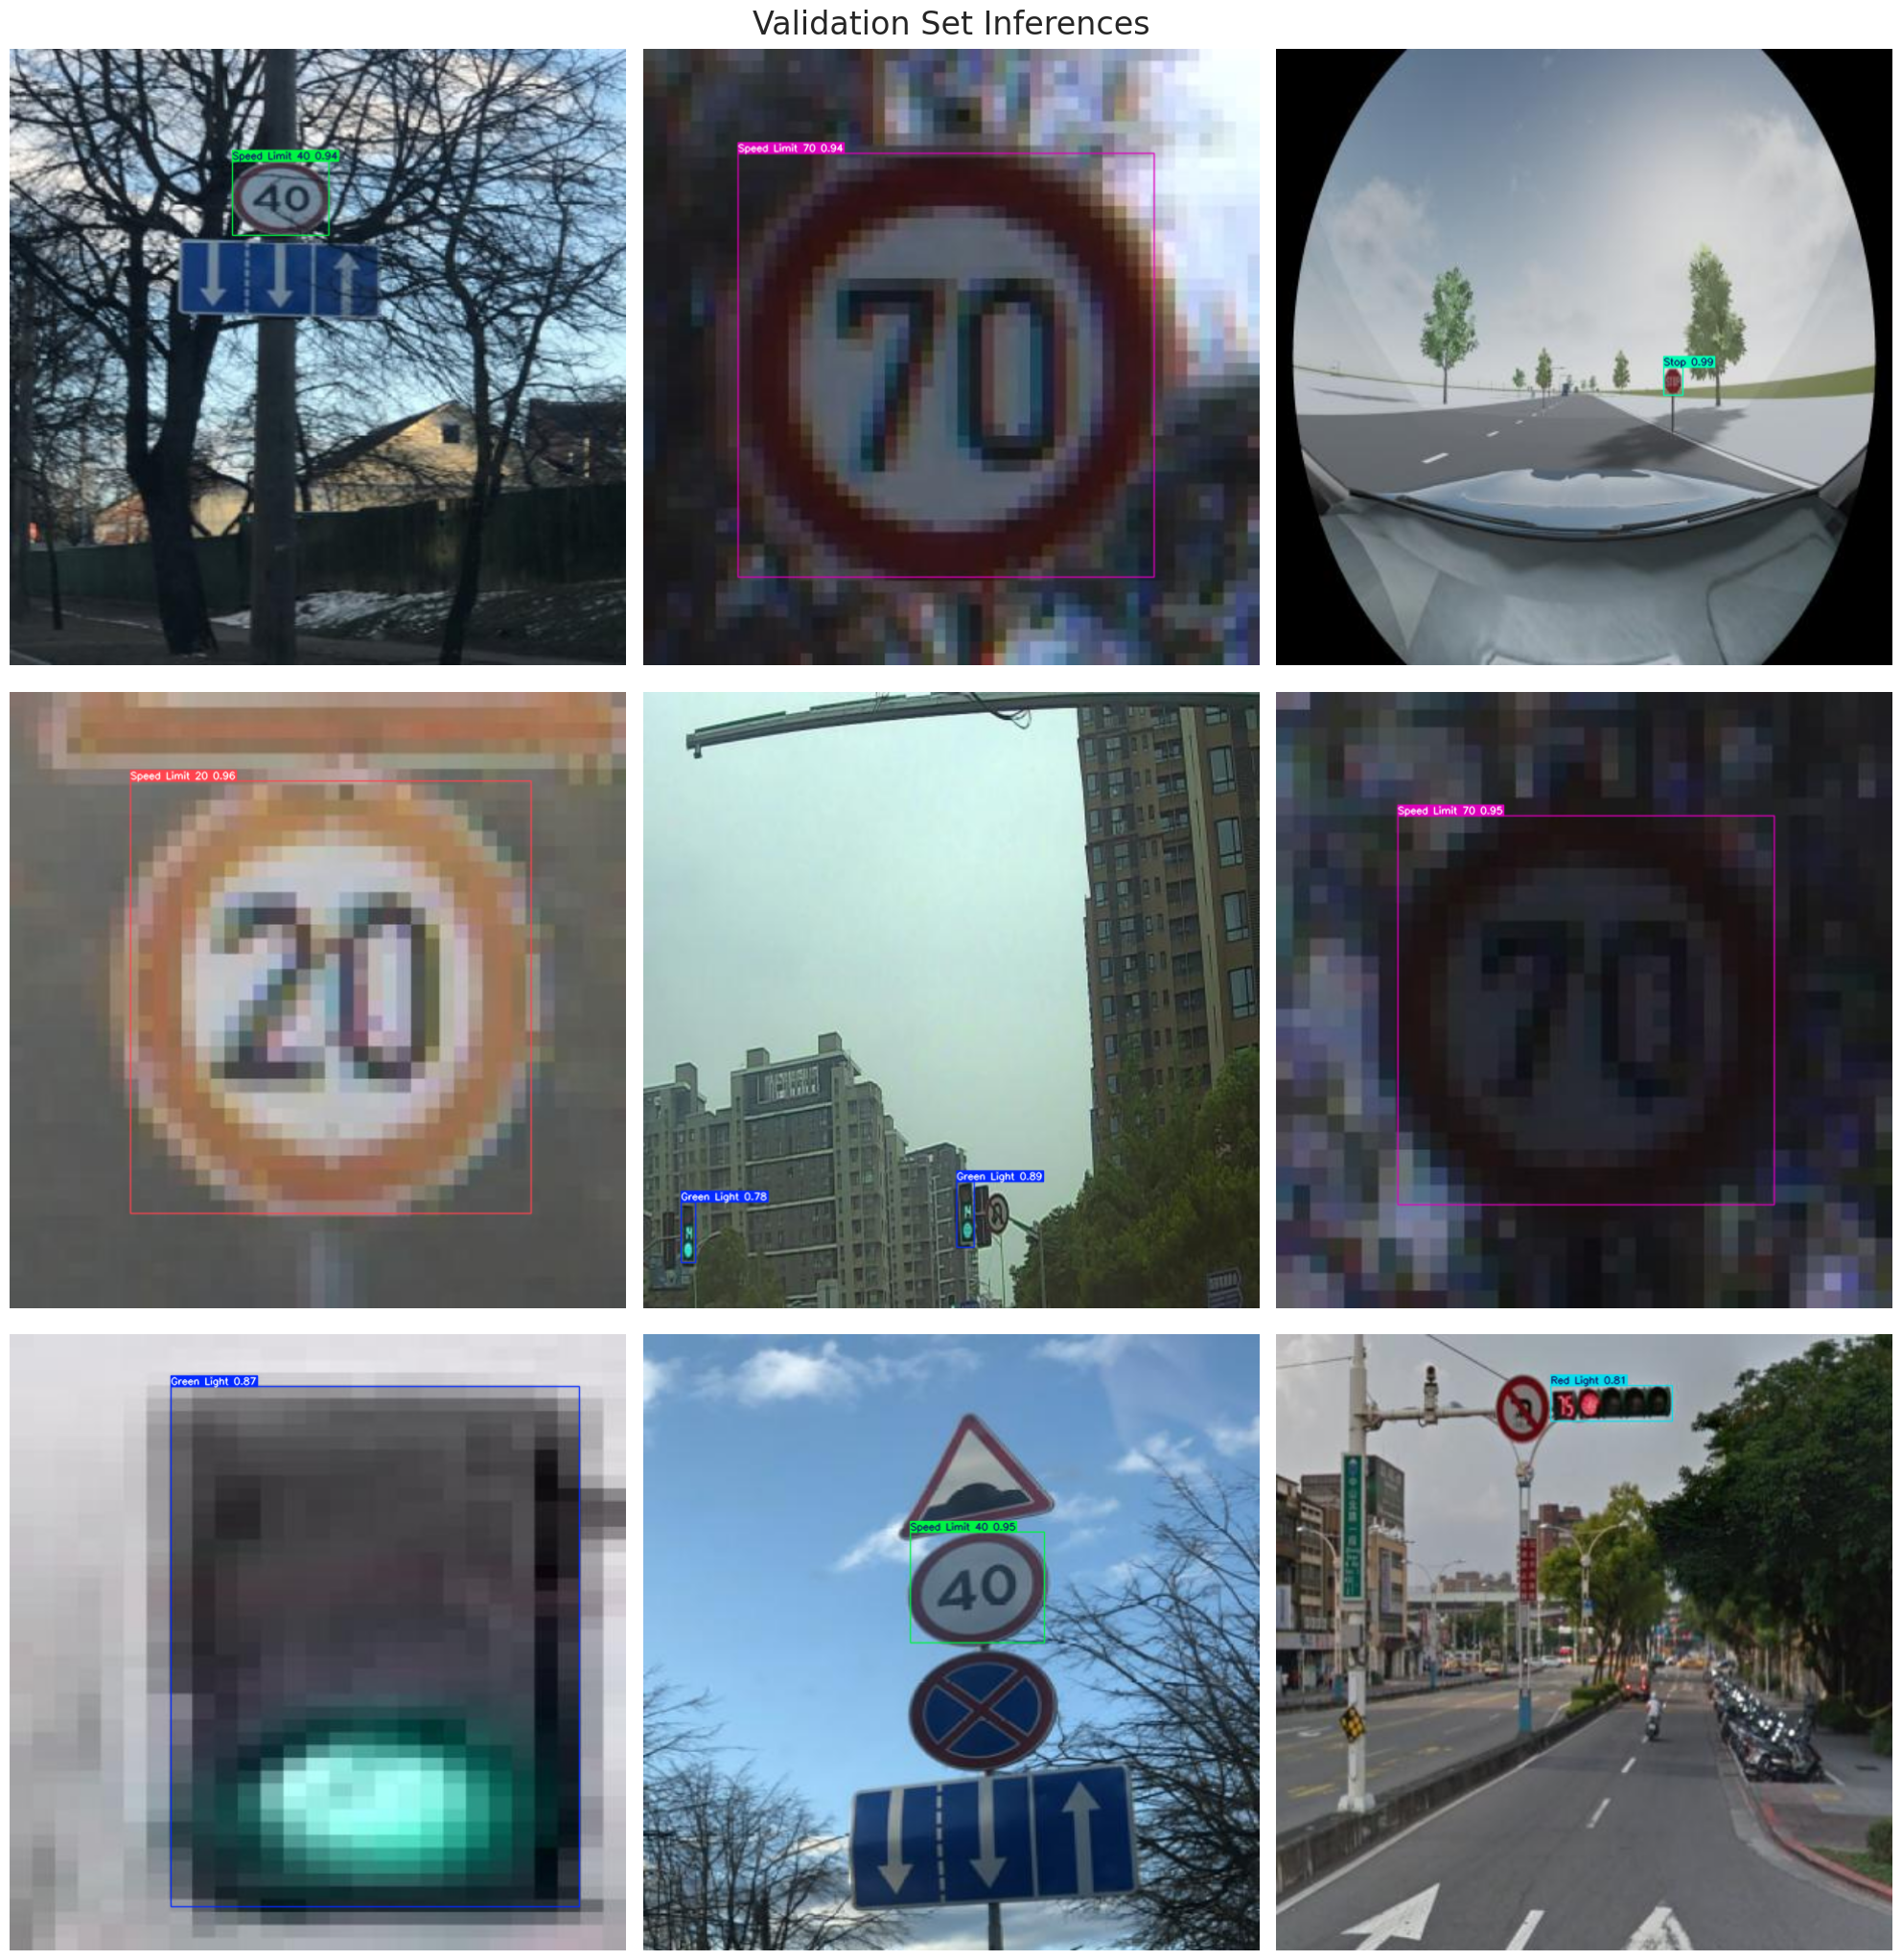

In [ ]:
def normalize_image(image):
    return image / 255.0

def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)

dataset_path = './car'
valid_images_path = os.path.join(dataset_path, 'test', 'images')

image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]


if len(image_files) > 0:

    num_images = len(image_files)
    step_size = max(1, num_images // 9)
    selected_images = [image_files[i] for i in range(0, num_images, step_size)]


    fig, axes = plt.subplots(3, 3, figsize=(20, 21))
    fig.suptitle('Validation Set Inferences', fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(valid_images_path, selected_images[i])


            image = cv2.imread(image_path)

            if image is not None:
                resized_image = resize_image(image, size=(640, 640))
                normalized_image = normalize_image(resized_image)

                normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)

                results = Valid_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)

                annotated_image = results[0].plot(line_width=1)
                annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                ax.imshow(annotated_image_rgb)
            else:
                print(f"Failed to load image {image_path}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()